In [83]:
import pandas as pd #handling data in tabular form
import seaborn as sns

# The DATA

### LOAD the DATA

In [2]:
raw_data = pd.read_csv('garments_worker_productivity.csv')

In [3]:
raw_data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
#data frame copy of the original dataset, this can be manipulated freely
df = raw_data.copy() 

### Explore the DataSet

VISUALIZE THE ENTIRE DATAFRAME

INFORMATION ON THE DATAFRAME

In [5]:
#check for missing values (no missing values in this case, 700 values for each cathegory)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# PREPROCESSING

### DEPARTMENT

EXTRACT A SPECIFIC COLUMN

In [6]:
#extract the reason for absence
df['department']

0           sweing
1       finishing 
2           sweing
3           sweing
4           sweing
           ...    
1192     finishing
1193     finishing
1194     finishing
1195     finishing
1196     finishing
Name: department, Length: 1197, dtype: object

In [7]:
#return a list of all the different departments, non repeating values
#pd.unique(df['department'])

df['department'].unique()  #- this command does the same thing

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [8]:
#"finishing " and "finishing" should be the same
#map both "finishing " to "finishing"
df['department'] = df['department'].map({'finishing ':'finishing', 'finishing':'finishing', 'sweing':'sweing'})

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
df['department'].unique()  #- this command does the same thing

array(['sweing', 'finishing'], dtype=object)

In [10]:
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [11]:
#turn reason for absence into a dummy variable
departments = pd.get_dummies(df['department'])
departments

,finishing,sweing
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1192,1,0
1193,1,0
1194,1,0
1195,1,0


REPLACE "department" with DUMMY VARIABLES in the DATAFRAME

In [12]:
#remove department
df = df.drop(['department'], axis = 1)

#add the new DUMMY features to the data frame
df = pd.concat([df, departments], axis=1)

In [13]:
df

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,finishing,sweing
0,1/1/2015,Quarter1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,1
1,1/1/2015,Quarter1,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,0
2,1/1/2015,Quarter1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
3,1/1/2015,Quarter1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
4,1/1/2015,Quarter1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,1,0
1193,3/11/2015,Quarter2,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,1,0
1194,3/11/2015,Quarter2,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,1,0
1195,3/11/2015,Quarter2,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,1,0


In [14]:
#rename the new columns
df.columns.values

array(['date', 'quarter', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'finishing', 'sweing'], dtype=object)

In [15]:
column_names = ['date', 'quarter', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'dept_finishing', 'dept_sweing']
df.columns = column_names
df.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,dept_finishing,dept_sweing
0,1/1/2015,Quarter1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,1
1,1/1/2015,Quarter1,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,0
2,1/1/2015,Quarter1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
3,1/1/2015,Quarter1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
4,1/1/2015,Quarter1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,1


### Team number

In [16]:
#check how many team numbers
pd.unique(df['team'])

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4], dtype=int64)

In [17]:
#count how many for each team 
df['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

In [18]:
#get dummies from team and add them to the data frame
teams = pd.get_dummies(df['team'])
df = pd.concat([df, teams], axis=1)

df.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,...,3,4,5,6,7,8,9,10,11,12
0,1/1/2015,Quarter1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1/1/2015,Quarter1,Thursday,1,0.75,3.94,NaN,960,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1/1/2015,Quarter1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1/1/2015,Quarter1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,...,0,0,0,0,0,0,0,0,0,1
4,1/1/2015,Quarter1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
#change new dummy features name
df.columns.values

array(['date', 'quarter', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'dept_finishing', 'dept_sweing', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
       12], dtype=object)

In [21]:
#replace team with the new names
df = df.drop(['team'], axis = 1)
column_names = ['date', 'quarter', 'day', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'dept_finishing', 'dept_sweing', 'team 1', 'team 2','team 3','team 4', 'team 5', 'team 6', 'team 7', 'team 8', 'team 9', 'team 10', 'team 11',
       'team 12']
df.columns = column_names
df.head()

,date,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,...,team 3,team 4,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12
0,1/1/2015,Quarter1,Thursday,0.80,26.16,1108.0,7080,98,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1,1/1/2015,Quarter1,Thursday,0.75,3.94,NaN,960,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/1/2015,Quarter1,Thursday,0.80,11.41,968.0,3660,50,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,1/1/2015,Quarter1,Thursday,0.80,11.41,968.0,3660,50,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1/1/2015,Quarter1,Thursday,0.80,25.90,1170.0,1920,50,0.0,0,...,0,0,0,1,0,0,0,0,0,0


**REORDER COLUMN NAMES**

# CHECKPOINT

CREATE A COPY OF THE CURRENT STATE OF THE DATAFRAME

In [22]:
df_dummies = df.copy()

## DATE FEATURE

In [23]:
#check the type of the first value of the "Data" series (all the other are the same)
type(df['date'][0])

str

Convert it to a "timestamp" data type (useful for dates and time)

In [24]:
#must specify the format
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['date']

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

### Create a month column in the data frame

In [27]:
#visualize one value
df['date'][0]

Timestamp('2015-01-01 00:00:00')

In [28]:
#get the month
df['date'][0].month

1

In [29]:
#create a list with the month value of each row in the data frame
list_months = []

for i in range(len(df['date'])):
    list_months.append(df['date'][i].month)


CREATE THE NEW COLUMN 

In [30]:
df['month'] = list_months
df.head(2)

,date,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,...,team 4,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month
0,2015-01-01,Quarter1,Thursday,0.80,26.16,1108.0,7080,98,0.0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015-01-01,Quarter1,Thursday,0.75,3.94,NaN,960,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


### day (of the Week)

map from string to Monday = 0, Tuesday = 1, ..., Sunday = 6

In [31]:
#visualize days of the week
df['day'].unique()  #- this command does the same thing

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [32]:
#map names to integers, note there is no Friday
df['day'] = df['day'].map({'Thursday':3, 'Saturday':5, 'Sunday':6, 'Monday':0, 'Tuesday':1, 'Wednesday':2})

df.head()

,date,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,...,team 4,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month
0,2015-01-01,Quarter1,3,0.80,26.16,1108.0,7080,98,0.0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015-01-01,Quarter1,3,0.75,3.94,NaN,960,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,2015-01-01,Quarter1,3,0.80,11.41,968.0,3660,50,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,2015-01-01,Quarter1,3,0.80,11.41,968.0,3660,50,0.0,0,...,0,0,0,0,0,0,0,0,1,1
4,2015-01-01,Quarter1,3,0.80,25.90,1170.0,1920,50,0.0,0,...,0,0,1,0,0,0,0,0,0,1


Get Rid of date column (not needed anymore)

In [33]:
#drop date
df= df.drop(['date'], axis=1)
df.head()

,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,team 4,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month
0,Quarter1,3,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,Quarter1,3,0.75,3.94,NaN,960,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Quarter1,3,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,Quarter1,3,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,Quarter1,3,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


## quarter

map quarter from string to 1-4

In [34]:
#visualize quarters to make sure there is 4 of them
df['quarter'].unique() 

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [35]:
#map names to integers, note there is 5 of them, don' matter
df['quarter'] = df['quarter'].map({'Quarter1':1,'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5})

df.head()

,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,team 4,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month
0,1,3,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,3,0.75,3.94,NaN,960,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,3,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1,3,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Wip

Replace missing values with avg (or other method)

In [38]:
df['wip'].describe(include = 'all')

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

In [58]:
df_missing_values = df.copy()

In [59]:
df_missing_values['wip'].mean()

1190.4659913169319

In [60]:
df_missing_values['wip'].median()

1039.0

In [63]:
for i in range(len(df_missing_values['wip'])):
    if (df_missing_values['wip'][i]-df_missing_values['wip'][i]!=0):
        df_missing_values['wip'][i]= 1039.0

C:\Users\aless\AppData\Local\Temp\ipykernel_30196\4005183305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing_values['wip'][i]= 1039.0


In [64]:
df_missing_values.head()

,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,team 4,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month
0,1,3,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,3,0.75,3.94,1039.0,960,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,3,0.80,11.41,968.0,3660,50,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1,3,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [65]:
df_missing_values['wip'].describe(include = 'all')

count     1197.000000
mean      1126.437761
std       1397.653191
min          7.000000
25%        970.000000
50%       1039.000000
75%       1083.000000
max      23122.000000
Name: wip, dtype: float64

In [66]:
df_missing_values['wip'][1]

1039.0

## TARGETED PRODUCTIVITY & ACTUAL PRODUCTIVITY

replace with PRODUCTIVITY: productivity = 0 if tp>ap, 1 if tp<ap


In [70]:
#create a productivity list
productivity = []
for i in range(len(df_missing_values['targeted_productivity'])):
    if (df_missing_values['targeted_productivity'][i] <df_missing_values['actual_productivity'][i]):
        productivity.append(1)
    else:
        productivity.append(0)

In [71]:
productivity

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [73]:
#add productivity to the dataframe
df_missing_values['productivity'] = productivity
df_missing_values.head(2)

,quarter,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month,productivity
0,1,3,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,1,3,0.75,3.94,1039.0,960,0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [74]:
#drop targeted_productivity and actual_productivity
df_missing_values = df_missing_values.drop(['targeted_productivity','actual_productivity'], axis = 1)
df_missing_values.head(2)

,quarter,day,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month,productivity
0,1,3,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,1,0,0,0,0,1,1
1,1,3,3.94,1039.0,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,0,1,1


## Outliers

EXPLORE THE DISTRIBUTION: smv

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='smv', ylabel='Density'>

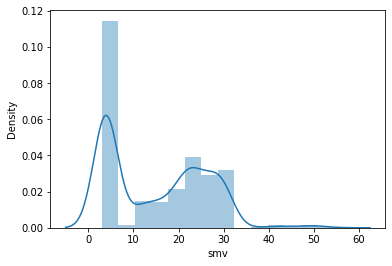

In [84]:
#plot the distribution
sns.distplot(df_missing_values['smv'])

In [90]:
#describe the distribution
df_missing_values['smv'].describe(include = 'all')

count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64

In [91]:
#keep only data lesser than the 99th percentile
q = df_missing_values['smv'].quantile(0.99)
data_no_outliers = df_missing_values[df_missing_values['smv']<q]

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='smv', ylabel='Density'>

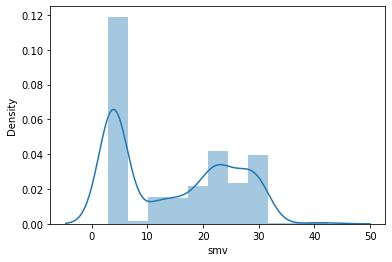

In [92]:
#plot the new distribution
sns.distplot(data_no_outliers['smv'])

EXPLORE THE DISTRIBUTION: wip

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wip', ylabel='Density'>

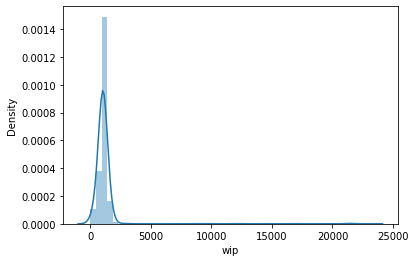

In [85]:
#plot the distribution
sns.distplot(df_missing_values['wip'])

In [94]:
#keep only data lesser than the 99th percentile
q = data_no_outliers['wip'].quantile(0.99)
data_no_outliers = data_no_outliers[data_no_outliers['wip']<q]

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wip', ylabel='Density'>

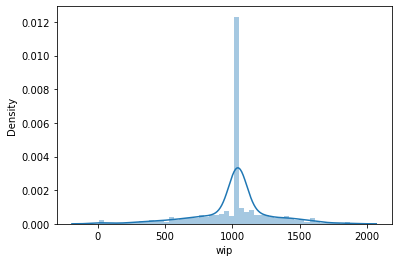

In [95]:
#plot the new distribution
sns.distplot(data_no_outliers['wip'])

EXPLORE THE DISTRIBUTION: over_time

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='over_time', ylabel='Density'>

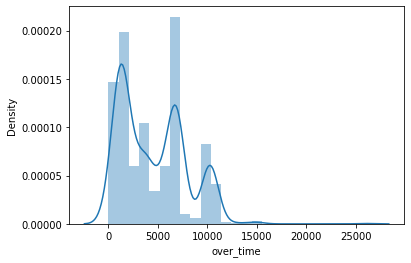

In [86]:
#plot the distribution
sns.distplot(df_missing_values['over_time'])

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='over_time', ylabel='Density'>

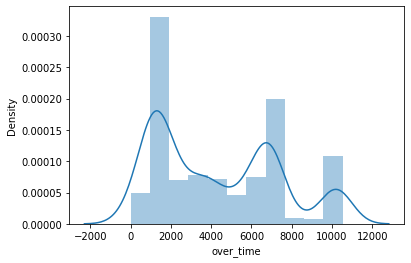

In [96]:
#keep only data lesser than the 99th percentile
q = data_no_outliers['over_time'].quantile(0.99)
data_no_outliers = data_no_outliers[data_no_outliers['over_time']<q]
#plot the new distribution
sns.distplot(data_no_outliers['over_time'])

EXPLORE THE DISTRIBUTION: incentive

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incentive', ylabel='Density'>

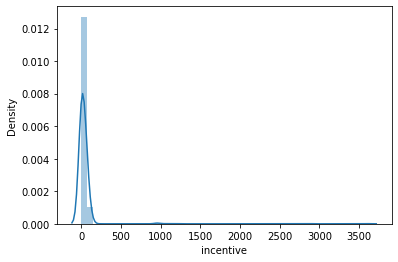

In [87]:
#plot the distribution
sns.distplot(df_missing_values['incentive'])

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incentive', ylabel='Density'>

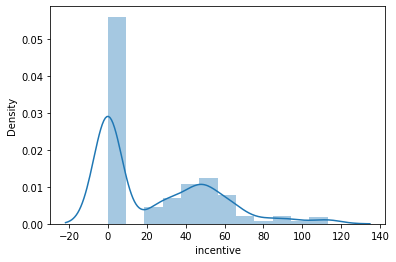

In [97]:
#keep only data lesser than the 99th percentile
q = data_no_outliers['incentive'].quantile(0.99)
data_no_outliers = data_no_outliers[data_no_outliers['incentive']<q]
#plot the new distribution
sns.distplot(data_no_outliers['incentive'])

EXPLORE THE DISTRIBUTION: no_of_workers

C:\Users\aless\anaconda3\envs\mnist\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_workers', ylabel='Density'>

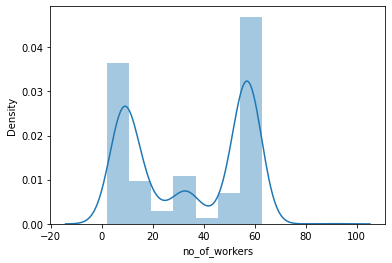

In [88]:
#plot the distribution
sns.distplot(df_missing_values['no_of_workers'])

In [98]:
df_missing_values['no_of_workers'].describe(include='all')

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64

In [99]:
#describe the new dataframe with no outliers
data_no_outliers.describe(include='all')

,quarter,day,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,month,productivity
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,...,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,2.405142,2.858156,14.492926,1015.215426,4347.810284,24.395390,0.774823,0.391844,0.157801,33.837323,...,0.079787,0.081560,0.082447,0.094858,0.077128,0.085993,0.072695,0.085106,1.739362,0.727837
std,1.225234,2.105746,10.408849,269.673181,3105.731434,29.536251,13.091728,3.366256,0.437699,22.181311,...,0.271084,0.273815,0.275166,0.293149,0.266912,0.280478,0.259750,0.279164,0.742530,0.445271
min,1.000000,0.000000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,3.940000,968.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,2.000000,14.890000,1039.000000,3780.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,3.000000,5.000000,22.940000,1065.250000,6840.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
max,5.000000,6.000000,42.410000,1871.000000,10530.000000,113.000000,300.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


# LAST CHECKPOINT

In [100]:
#save the final DataFrame
preprocessed_data = data_no_outliers.copy()

In [101]:
#rearrange the columns
preprocessed_data.columns.values

array(['quarter', 'day', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'dept_finishing', 'dept_sweing', 'team 1', 'team 2', 'team 3',
       'team 4', 'team 5', 'team 6', 'team 7', 'team 8', 'team 9',
       'team 10', 'team 11', 'team 12', 'month', 'productivity'],
      dtype=object)

In [102]:
column_names_ordered = ['quarter', 'day','month', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'dept_finishing', 'dept_sweing', 'team 1', 'team 2', 'team 3',
       'team 4', 'team 5', 'team 6', 'team 7', 'team 8', 'team 9',
       'team 10', 'team 11', 'team 12', 'productivity']
preprocessed_data = preprocessed_data[column_names_ordered]
preprocessed_data.head(1)

,quarter,day,month,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,team 4,team 5,team 6,team 7,team 8,team 9,team 10,team 11,team 12,productivity
0,1,3,1,26.16,1108.0,7080,98,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Store the preprocessed DF in a .csv file

In [103]:
preprocessed_data.to_csv('preprocessed_data', index=False)